In [1]:
import oreba_dis as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import inertial_dnn as dnn
import metrics as me

To Get processed dataset

In [2]:
test_data,test_label, train_data,train_label, vali_data, vali_label = od.get_dataset()

Cost after epoch 0: 0.002871
Cost after epoch 1000: 0.002536
Cost after epoch 2000: 0.002531


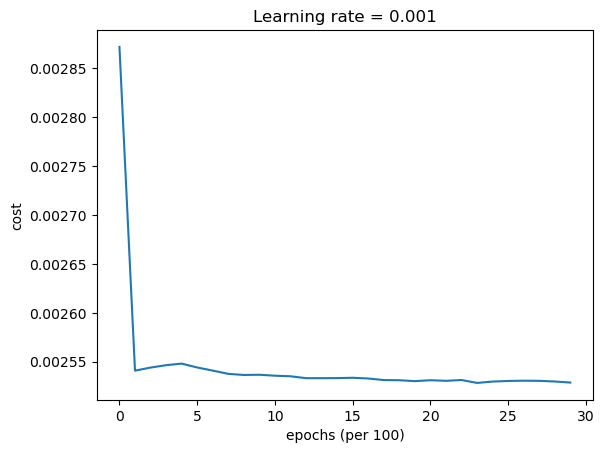

In [3]:
train_data = train_data[:,:100000]
train_label = train_label[:,:100000]
layers_dims = [train_data.shape[0], 5,6, 5, 4 , 3, 1]
lambd = 0
mini_batch_size = 128
learning_rate = 0.001
parameters = dnn.model(train_data, train_label, layers_dims, lambd, mini_batch_size,learning_rate=learning_rate, num_epochs = 3000)

In [4]:
p = me.predict(test_data, test_label, parameters)
TP,TN,FP,FN = me.TP_TN_FP_FN(p, test_label)
print("TP "+str(TP))
print("TN "+str(TN))
print("FP "+str(FP))
print("FN "+str(FN))
print(np.sum(p==1))
print(np.sum(test_label==1))

precision = me.Precision(TP, FP)
recall = me.Recall(TP, FN)
f1 = me.F1(precision, recall)
print("precision: "+str(precision))
print("recall: "+str(recall))
print("F1: "+str(f1))

Accuracy: 0.48218290625903937
TP 91063
TN 422348
FP 504599
FN 46754
595662
137817
precision: 0.15287696713908222
recall: 0.6607530275655398
F1: 0.24830431409760878
